## Environment setup

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
WORKING_PATH = '/content/drive/MyDrive/KeepCoding/NLP/exercise'


In [3]:
%cd {WORKING_PATH}

/content/drive/MyDrive/KeepCoding/NLP/exercise


In [4]:
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 20.3 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=3366525478655f4317339c3a4c509b5c8426a0a13f223e1bb8199565011e82c4
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existin

In [4]:
import sys
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS
import random
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import unicodedata
from num2words import num2words
import nltk
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet, stopwords
import string

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# to load custom libraries
sys.path.append(WORKING_PATH)

# load custom libraries

## Load data

In [6]:
# Read data
df = pd.read_json('reviews_Patio_Lawn_and_Garden_5.json', lines=True)
df.shape

(13272, 9)

## EDA

In [7]:
# Explore dataframe
df.head().T

,0,1,2,3,4
reviewerID,A1JZFGZEZVWQPY,A32JCI4AK2JTTG,A3N0P5AAMP6XD2,A2QK7UNJ857YG,AS0CYBAN6EM06
asin,B00002N674,B00002N674,B00002N674,B00002N674,B00002N674
reviewerName,"Carter H ""1amazonreviewer@gmail . com""","Darryl Bennett ""Fuzzy342""",H B,Jason,jimmy
helpful,"[4, 4]","[0, 0]","[2, 3]","[0, 0]","[1, 1]"
reviewText,Good USA company that stands behind their prod...,This is a high quality 8 ply hose. I have had ...,It's probably one of the best hoses I've ever ...,I probably should have bought something a bit ...,I bought three of these 5/8-inch Flexogen hose...
overall,4,5,4,5,5
summary,Great Hoses,Gilmour 10-58050 8-ply Flexogen Hose 5/8-Inch ...,Very satisfied!,Very high quality,Good Hoses
unixReviewTime,1308614400,1402272000,1336176000,1373846400,1375660800
reviewTime,"06 21, 2011","06 9, 2014","05 5, 2012","07 15, 2013","08 5, 2013"


The columns containing the necessary information for analysis are selected: 'reviewText' and 'overall'.

In [8]:
# Select columns reviewText and overall
df = df.loc[:, ['reviewText', 'overall']]
df.shape

(13272, 2)

The presence of NA values is checked.

In [9]:
# Type of columns and NAs checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13272 entries, 0 to 13271
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  13272 non-null  object
 1   overall     13272 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 207.5+ KB


The lengths of the texts in 'reviewText' are analyzed. The average length is approximately 850 characters, with some texts being empty and others exceeding 10000 characters.

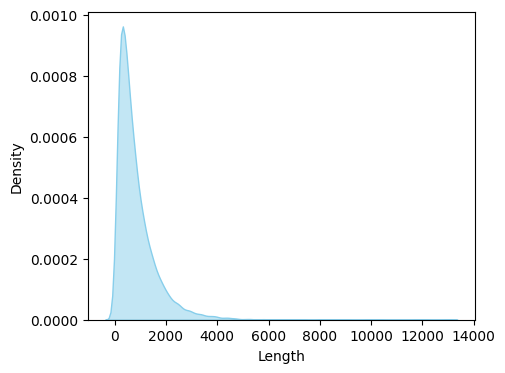

,lengthText
count,13272.000000
mean,848.529913
std,825.234766
min,0.000000
25%,320.000000
50%,604.000000
75%,1099.250000
max,12996.000000


In [10]:
# Distribution for text size
plt.figure(figsize=(5,4))
df['lengthText'] = df['reviewText'].apply(len)
sns.kdeplot(df['lengthText'], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Length')
plt.ylabel('Density')
plt.show()
df['lengthText'].describe()

Entries with empty texts are removed.

In [11]:
# Remove entries without text
print(f'Found {sum(df["lengthText"] == 0)} entries without text')

df = df[df['lengthText'] != 0]

Found 14 entries without text


The values for the 'overall' variable range from 1 to 5, with a majority of entries rated 5 (7029 occurrences) and a progressive decline to 1.

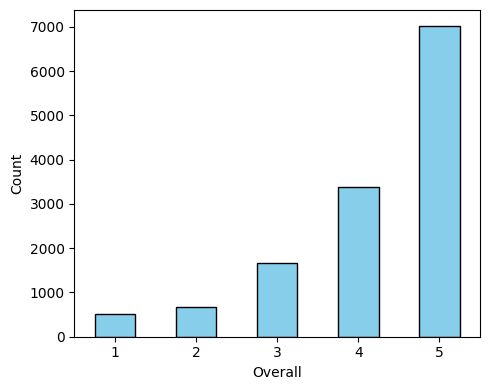

,count
overall,
5,7029
4,3382
3,1657
2,673
1,517


In [12]:
# Distribution overall
plt.figure(figsize=(5,4))
counts = df['overall'].value_counts()
counts = counts.loc[sorted(counts.index)]
# Plot value counts as bars
counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Customize
plt.xlabel('Overall')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Prevent label clipping
plt.show()
df['overall'].value_counts()

The dataset is clearly imbalanced so levels one, two and three will be classified as negative reactions and levels four and five as positive reactions. This helps mitigate some of this imbalance in sample distribution.

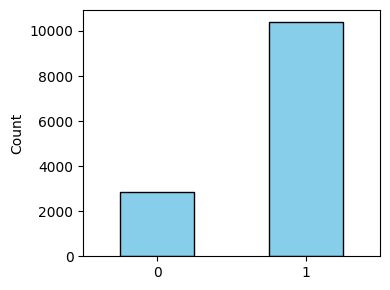

,count
sentiment,
1,10411
0,2847


In [13]:
# Classify overall into negative sentiment (0) and positive sentiment (1)
df['sentiment'] = df['overall'].apply(lambda x: 0 if x < 4 else 1)

# Distribution
plt.figure(figsize=(4,3))
counts = df['sentiment'].value_counts()
counts = counts.loc[sorted(counts.index)]
# Plot value counts as bars
counts.plot(kind='bar', color='skyblue', edgecolor='black')
# Customize
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()  # Prevent label clipping
plt.show()
df['sentiment'].value_counts()


## Text normalization

Review texts undergo a comprehensive normalization process to standardize linguistic features while preserving semantic meaning. First, negative contractions (e.g., "don't") are expanded to their full forms ("do not"), and punctuation marks are isolated with spaces to ensure proper tokenization. The text is then tokenized and processed through a Part-of-Speech (POS)-aware lemmatization pipeline using WordNet's morphosyntactic tags, where words are reduced to their canonical forms (e.g., "running" → "run") according to their grammatical category (verbs, nouns, adjectives, or adverbs). During this process: (1) stopwords and punctuation are removed, (2) numeric values are converted to their word equivalents (e.g., "3" → "three"), and (3) negation terms (e.g., "not", "nor") are standardized to "no" for consistent sentiment analysis. This multi-stage approach ensures the output is optimized for downstream NLP tasks by maintaining lexical meaning while eliminating noise and morphological variability. The pipeline specifically handles edge cases like irregular verbs through POS-tag prioritization and preserves negation context crucial for sentiment interpretation.

In [45]:
# Normalize texts
def get_wordnet_pos(treebank_tag):
  """
  Convert POS tags to WordNet format
  """
  if treebank_tag.startswith('J'):
      return wordnet.ADJ
  elif treebank_tag.startswith('V'):
      return wordnet.VERB
  elif treebank_tag.startswith('N'):
      return wordnet.NOUN
  elif treebank_tag.startswith('R'):
      return wordnet.ADV
  else:
      return wordnet.NOUN  # Default to noun

def normalize_text(text):
  """
  Normalize raw text by performing lemmatization, stopword removal, and negation handling.
  """
  # Initialize lemmatizer and stopwords
  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))
  punctuation = set(string.punctuation)
  # Lowercase text
  text = text.lower()
  # Transform negative contractions (don't --> do not)
  text = re.sub(r"n't", " not", text)
  # Add spaces before and after punctuation marks.
  pattern = re.compile(f"[{re.escape(''.join(punctuation))}]")
  text = pattern.sub(f' {" "} ', text)
  # Tokenize
  tokens = word_tokenize(text)
  # Normalize negative words (n't, not, nor)
  tokens = list(map(lambda x: 'no' if x in ["n't", 'not', 'nor'] else x, tokens))
  # Digit to word
  tokens = list(map(lambda x: num2words(x, ordinal=False) if x.isdigit() else x, tokens))
  # POS tag
  pos_tags = pos_tag(tokens)
  # Lemmatize each word with POS context
  lemmatized = []
  for word, tag in pos_tags:
    if (word == 'no') or (word not in stop_words and word not in punctuation):
      pos = get_wordnet_pos(tag)
      lemma = lemmatizer.lemmatize(word, pos=pos)
      lemmatized.append(lemma)
  return ' '.join(lemmatized)


To identify the most salient lexical patterns in the processed reviews, we conducted both unigram and bigram frequency analyses using scikit-learn's CountVectorizer. The top 10 most frequent unigrams were extracted by sorting the summed counts in descending order. This same analytical procedure was replicated for bigrams (two-word sequences) by adjusting the ngram_range parameter, allowing us to examine both individual term prevalence and meaningful two-word collocations. This frequency-based approach serves as a foundational text analysis technique for understanding dominant topics and linguistic patterns in the corpus. The most frequent bigrams include sentiment-indicating phrases such as 'work well' and 'easy use'.

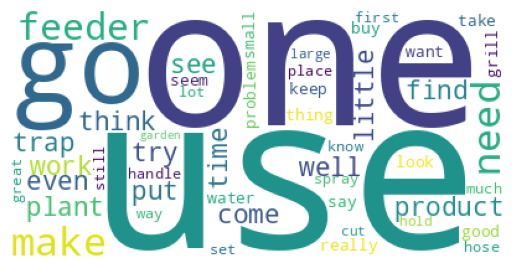


Vocabulary size before processing: 96462
Vocabulary size after processing: 23086

Top 10 most frequent unigrams
32819	no
15567	use
13523	one
10292	get
7911	work
7893	two
7392	like
6824	make
6791	trap
6508	well

Top 10 most frequent bigrams
2090	hundred and
1458	thirty four
1385	work well
1363	ca no
1154	two hundred
913	thousand two
868	would no
857	eight thousand
841	wo no
802	easy use

Some examples

My finch love this feeder! So do the woodpeckers love it too. Very well constructed looks great, easy to fill and easy to clean. I have seen as many as eight birds on it at one time. Great price great product fast delivery
finch love feeder woodpecker love well construct look great easy fill easy clean see many eight bird one time great price great product fast delivery

This is a pretty hummingbird feeder as shown here.  It's made from glass and tin and looks nice.  It's easy to clean, easy to fill.  But what it lacks is a sturdy base.  Since no chain is enclosed to attach from the top 

In [46]:
processed_text = []
for text in df['reviewText']:
  processed_text.append(normalize_text(text))
df['reviewTextProc'] = processed_text

# wordcloud
combined_text_proc = " ".join(df.loc[:, 'reviewTextProc'])
wc = WordCloud(background_color='white', max_words=50)

plt.imshow(wc.generate(combined_text_proc))
plt.axis('off')
plt.show()

# size vocabulary
combined_text = " ".join(df.loc[:, 'reviewText'])
list_words = combined_text.split()
unique_words = set(list_words)
print(f'\nVocabulary size before processing: {len(unique_words)}')
list_words = combined_text_proc.split()
unique_words = set(list_words)
print(f'Vocabulary size after processing: {len(unique_words)}')

# unigrams analysis
print('\nTop 10 most frequent unigrams')
countUni = CountVectorizer(ngram_range=(1, 1))
totalCountUni = countUni.fit_transform(df.loc[:,'reviewTextProc']).sum(axis=0)

top_indices = np.argsort(totalCountUni)[0, -10:].tolist()[0][::-1]
top_values = totalCountUni[0, top_indices].tolist()[0]

for idx, val in zip(top_indices, top_values):
    print(f"{val}\t{countUni.get_feature_names_out()[idx]}")

# bigrams analysis
print('\nTop 10 most frequent bigrams')
countBi = CountVectorizer(ngram_range=(2, 2))
totalCountBi = countBi.fit_transform(df.loc[:,'reviewTextProc']).sum(axis=0)

top_indices = np.argsort(totalCountBi)[0, -10:].tolist()[0][::-1]
top_values = totalCountBi[0, top_indices].tolist()[0]

for idx, val in zip(top_indices, top_values):
    print(f"{val}\t{countBi.get_feature_names_out()[idx]}")

# some examples
print('\nSome examples')
idx_examples = random.sample(df.index.tolist(),5)
for idx in idx_examples:
  print(f'\n{df.loc[idx, "reviewText"]}')
  print(df.loc[idx, 'reviewTextProc'])

After text normalization, we analyze the distribution of the number of tokens (or words) per review. After normalization some reviews keep only one word, while others contain over 1,000 words.

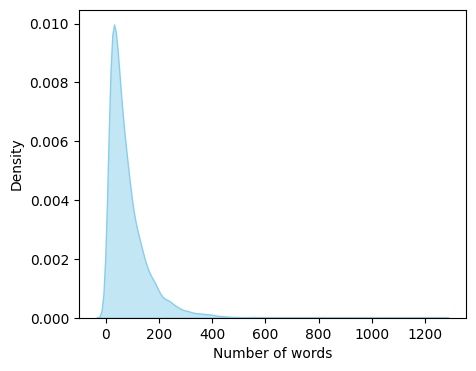

,numWords
count,13258.000000
mean,83.184719
std,81.730785
min,1.000000
25%,31.000000
50%,59.000000
75%,108.000000
max,1253.000000


In [16]:
# Distribution of the number of words for each review
plt.figure(figsize=(5,4))
df['numWords'] = df['reviewTextProc'].apply(lambda x: len(x.split()))
sns.kdeplot(df['numWords'], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Number of words')
plt.ylabel('Density')
plt.show()
df['numWords'].describe()

In [17]:
df[df['numWords'] == 1]

,reviewText,overall,lengthText,sentiment,reviewTextProc,numWords
71,GOOD,4,4,1,good,1
876,NICE,4,4,1,nice,1
4153,BROKE,2,5,0,broke,1
5979,Does the job.,3,13,0,job,1
8267,as described,5,12,1,described,1
9693,PRETTY,4,6,1,pretty,1
10368,They are perfedt.,5,17,1,perfedt,1
10379,Excellent,5,9,1,excellent,1


In [18]:
df[df['numWords'] > 1100]

,reviewText,overall,lengthText,sentiment,reviewTextProc,numWords
8391,For all of you who don't want to read all of m...,5,11816,1,no want read discovery learn experience conclu...,1167
10499,THE QUESTI started my quest for a new grill fu...,5,10323,1,questi start quest new grill fully expect quic...,1253
11731,"Now that the gardening season is over, i find ...",2,12065,0,gardening season find wonder problem product t...,1187
12486,"NOTE: Before deciding to buy this model, look ...",2,12996,0,note decide buy model look announce led versio...,1206


The frequency distribution of unigrams reveals a heavy-tailed pattern: 75% of unigrams exhibit low frequency (≤11 occurrences), whereas a small subset exceeds 10000 instances.

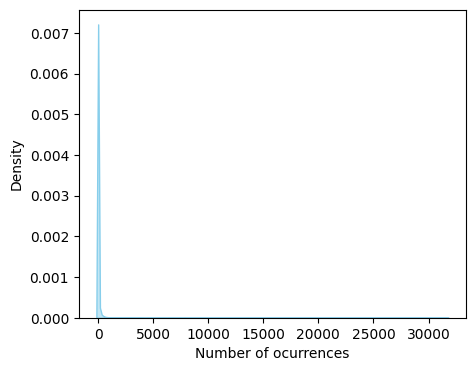

,CountUni
count,23070.000000
mean,47.898136
std,369.533420
min,1.000000
25%,1.000000
50%,2.000000
75%,9.000000
max,31679.000000


In [19]:
# Ditribution of number of ocurrences for each unigram
plt.figure(figsize=(5,4))
sns.kdeplot(totalCountUni.tolist()[0], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Number of ocurrences')
plt.ylabel('Density')
plt.show()
pd.DataFrame(totalCountUni.T, columns=['CountUni']).describe()

## Word embedding

This code implements a Word2Vec model to learn distributed representations of words from preprocessed review texts (reviewTextProc).
A Word2Vec model is trained to build word embeddings for the words into the preprocessed review texts. With the selected parameters the final vocalary is composed of 7919 words.

The model identifies the top 10 semantically similar words to a target set ('squirrel', 'fruit', 'grill', 'tree') using cosine similarity in the embedding space. The embeddings of these similar words are then extracted and visualized through a heatmap.

In [20]:
# Train word2vec model
w2v_model = Word2Vec(min_count=5,
                     window=2,
                     vector_size=30,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20
                     )

In [21]:
# Create vocabulary
sent = [row.split() for row in df['reviewTextProc']]
w2v_model.build_vocab(sent, progress_per=10000)
print('Vocabulary composed of {} words'.format(len(w2v_model.wv.key_to_index)))

Vocabulary composed of 7919 words


In [22]:
# Train model
w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(14629083, 33085890)

In [23]:
# Top10 words most similar to selected words
words = ['squirrel','fruit','grill','tree']
top10words = w2v_model.wv.most_similar(positive=words)
top10words

[('pecan', 0.8005956411361694),
 ('ironically', 0.725403904914856),
 ('persimmon', 0.717577338218689),
 ('offend', 0.7043278813362122),
 ('squirells', 0.7026858329772949),
 ('peach', 0.699112057685852),
 ('arbor', 0.6909598708152771),
 ('magnolia', 0.689241349697113),
 ('avocado', 0.686367392539978),
 ('chestnut', 0.6822248101234436)]

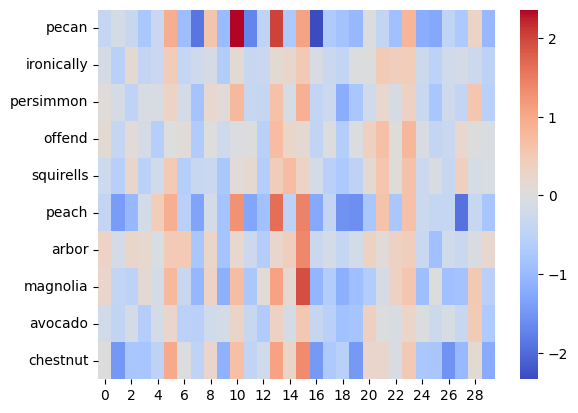

In [24]:
# Get embeddings for top10 similar words
words = [t[0] for t in top10words]
embeddings = w2v_model.wv[words]
# Plot heatmap with embeddings
sns.heatmap(embeddings,
            cmap = "coolwarm",
            yticklabels = words
)
plt.show()

### Conclusions

The dataset is clearly imbalanced. The decision to classify levels one, two and three as negative reactions and levels four and five as positive reactions helps mitigate some of this imbalance in sample distribution. This must be taken into account when analyzing the results.

Several preprocessing steps were applied, significantly reducing the vocabulary size (approximately 16000 terms). Among the most frequent unigrams are common words like 'use', 'work', and 'product', as well as numbers like 'one' and 'two'. The most frequent bigrams include sentiment-indicating phrases such as 'work well' and 'easy use'.

The distribution of unigrams per review shows:

- Some reviews contain only one word, while others exceed 1100 words.

- Most unigrams appear very few times—only a small fraction occur more than 20 times.

A Word2Vec model was trained on the review texts. Words appearing fewer than five times were filtered out, reducing the vocabulary to 7919 words. The embeddings were configured to a 30-dimensional space.

The ten most similar words to 'squirrel', 'fruit', 'grill', and 'tree' were identified. Their embeddings were visualized in a heatmap, revealing semantic similarity in coordinates 7, 15, 23, and 25.
